In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset_entregas_bn_1000.csv")

In [2]:
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clima                       1000 non-null   object 
 1   TraficoPico                 1000 non-null   object 
 2   RiesgoRuta                  1000 non-null   object 
 3   Distancia_km                1000 non-null   float64
 4   TiempoEstimado_min          1000 non-null   float64
 5   TiempoReal_min              1000 non-null   float64
 6   Demora_min                  1000 non-null   float64
 7   TipoCarga                   1000 non-null   object 
 8   Peso_kg                     1000 non-null   int64  
 9   ExperienciaConductor_anios  1000 non-null   int64  
 10  AntiguedadCamion_anios      1000 non-null   int64  
 11  FallasMecanicas             1000 non-null   object 
 12  NivelCombustible_pct        1000 non-null   float64
 13  HorarioSalida               1000 n

,Clima,TraficoPico,RiesgoRuta,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,Medio,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,Medio,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,Medio,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,Bajo,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
5,Tormenta,Medio,Bajo,273.30,328.0,404.1,76.2,Fragil,7362,6,8,No,58.6,Manana,No
6,Lluvia,Alto,Alto,210.50,315.8,392.9,77.1,Normal,10488,6,3,No,50.5,Manana,No
7,Lluvia,Medio,Medio,47.66,52.0,78.3,26.3,Normal,12606,6,8,No,99.4,Tarde,Si
8,Bueno,Medio,Medio,37.03,40.4,59.7,19.3,Normal,11542,5,6,No,62.5,Tarde,Si
9,Bueno,Medio,Bajo,265.28,318.3,352.4,34.0,Fragil,7748,7,5,No,74.9,Manana,No


In [3]:
# Mostrar valores únicos de la variable objetivo
print("\n--- Valores únicos de EntregaATiempo ---")
print(df["EntregaATiempo"].unique())


--- Valores únicos de EntregaATiempo ---
['No' 'Si']


In [4]:
# Separar variable objetivo y convertir a numérico
# "Si" = 1 (entrega a tiempo), "No" = 0 (no entrega a tiempo)
y = df["EntregaATiempo"].map({"Si": 1, "No": 0}).values
print(f"\n✓ Variable objetivo convertida: {np.unique(y, return_counts=True)}")


✓ Variable objetivo convertida: (array([0, 1]), array([507, 493]))


In [5]:
# Eliminar la variable objetivo del dataframe
df_features = df.drop(columns=["EntregaATiempo"])

In [6]:
# ==================== CODIFICACIÓN DE VARIABLES CATEGÓRICAS ====================

print("\n--- Aplicando codificación de variables categóricas ---")

# Variables nominales (One-Hot Encoding)
nominales = ['Clima', 'TipoCarga', 'HorarioSalida']


--- Aplicando codificación de variables categóricas ---


In [7]:
# Variables ordinales (Label Encoding)
ordinales = ['TraficoPico', 'RiesgoRuta']

In [8]:
# Variables binarias (Label Encoding)
binarias = ['FallasMecanicas']

In [9]:
df

,Clima,TraficoPico,RiesgoRuta,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,Medio,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,Medio,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,Medio,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,Bajo,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bueno,Medio,Medio,14.80,30.0,42.5,12.5,Normal,11473,5,4,No,65.3,Noche,Si
996,Lluvia,Bajo,Bajo,42.38,42.4,66.5,24.1,Fragil,2560,10,3,No,81.2,Tarde,Si
997,Bueno,Medio,Medio,164.09,179.0,206.0,27.0,Normal,7983,8,3,No,75.7,Manana,Si
998,Tormenta,Alto,Alto,122.55,245.1,314.5,69.4,Peligrosa,12663,11,6,No,75.3,Manana,Si


In [10]:
# Aplicar One-Hot Encoding a variables nominales
print("\n1. One-Hot Encoding para variables nominales:")
for col in nominales:
    if col in df_features.columns:
        unique_vals = df_features[col].unique()
        print(f"   {col}: {unique_vals}")
        
df_encoded = pd.get_dummies(df_features, columns=nominales, prefix=nominales, drop_first=False)


1. One-Hot Encoding para variables nominales:
   Clima: ['Lluvia' 'Bueno' 'Tormenta']
   TipoCarga: ['Fragil' 'Normal' 'Peligrosa']
   HorarioSalida: ['Noche' 'Manana' 'Tarde']


In [11]:
# Aplicar Label Encoding a variables ordinales
print("\n2. Label Encoding para variables ordinales:")
for col in ordinales:
    if col in df_encoded.columns:
        # Ordenar manualmente para mantener el orden: Bajo < Medio < Alto
        orden_map = {'Bajo': 0, 'Medio': 1, 'Alto': 2}
        df_encoded[col] = df_encoded[col].map(orden_map)
        print(f"   {col}: Bajo=0, Medio=1, Alto=2")



2. Label Encoding para variables ordinales:
   TraficoPico: Bajo=0, Medio=1, Alto=2
   RiesgoRuta: Bajo=0, Medio=1, Alto=2


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Aplicar Label Encoding a variables binarias
print("\n3. Label Encoding para variables binarias:")
for col in binarias:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        clases = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"   {col}: {clases}")



3. Label Encoding para variables binarias:
   FallasMecanicas: {'No': np.int64(0), 'Si': np.int64(1)}


In [40]:
print(f"\n✓ Dataset procesado: {X.shape[1]} features")
print(f"   - Features originales: {len(df_features.columns)}")
print(f"   - Features después de One-Hot: {X.shape[1]}")
print(f"\n--- Columnas finales ---")
for i, col in enumerate(df_encoded.columns):
    print(f"   {i+1}. {col}")


✓ Dataset procesado: 20 features
   - Features originales: 14
   - Features después de One-Hot: 20

--- Columnas finales ---
   1. TraficoPico
   2. RiesgoRuta
   3. Distancia_km
   4. TiempoEstimado_min
   5. TiempoReal_min
   6. Demora_min
   7. Peso_kg
   8. ExperienciaConductor_anios
   9. AntiguedadCamion_anios
   10. FallasMecanicas
   11. NivelCombustible_pct
   12. Clima_Bueno
   13. Clima_Lluvia
   14. Clima_Tormenta
   15. TipoCarga_Fragil
   16. TipoCarga_Normal
   17. TipoCarga_Peligrosa
   18. HorarioSalida_Manana
   19. HorarioSalida_Noche
   20. HorarioSalida_Tarde


In [42]:
import pandas as pd

# Supongamos que df_features.columns contiene los nombres de las columnas
# Y X contiene los valores numéricos (puede ser un DataFrame o una matriz de NumPy)

# Si X es una matriz NumPy, conviértela en DataFrame
df_values = pd.DataFrame(X, columns=df_encoded.columns)

# Combina el DataFrame con las columnas de df_features y los valores de X
# Si ya tienes un DataFrame (df_values) con las columnas y valores, lo puedes guardar directamente en un CSV

df_values.to_csv("archivo_completo.csv", index=False)



ANÁLISIS DE CORRELACIÓN

🔝 Top 10 correlaciones más fuertes:
   TiempoEstimado_min             ↔ TiempoReal_min                : +0.983
   Distancia_km                   ↔ TiempoEstimado_min            : +0.919
   Distancia_km                   ↔ TiempoReal_min                : +0.886
   Clima_Bueno                    ↔ Clima_Lluvia                  : -0.805
   TipoCarga_Fragil               ↔ TipoCarga_Normal              : -0.802
   HorarioSalida_Manana           ↔ HorarioSalida_Tarde           : -0.643
   Demora_min                     ↔ FallasMecanicas               : +0.552
   Peso_kg                        ↔ TipoCarga_Fragil              : -0.545
   HorarioSalida_Manana           ↔ HorarioSalida_Noche           : -0.513
   RiesgoRuta                     ↔ Demora_min                    : +0.486


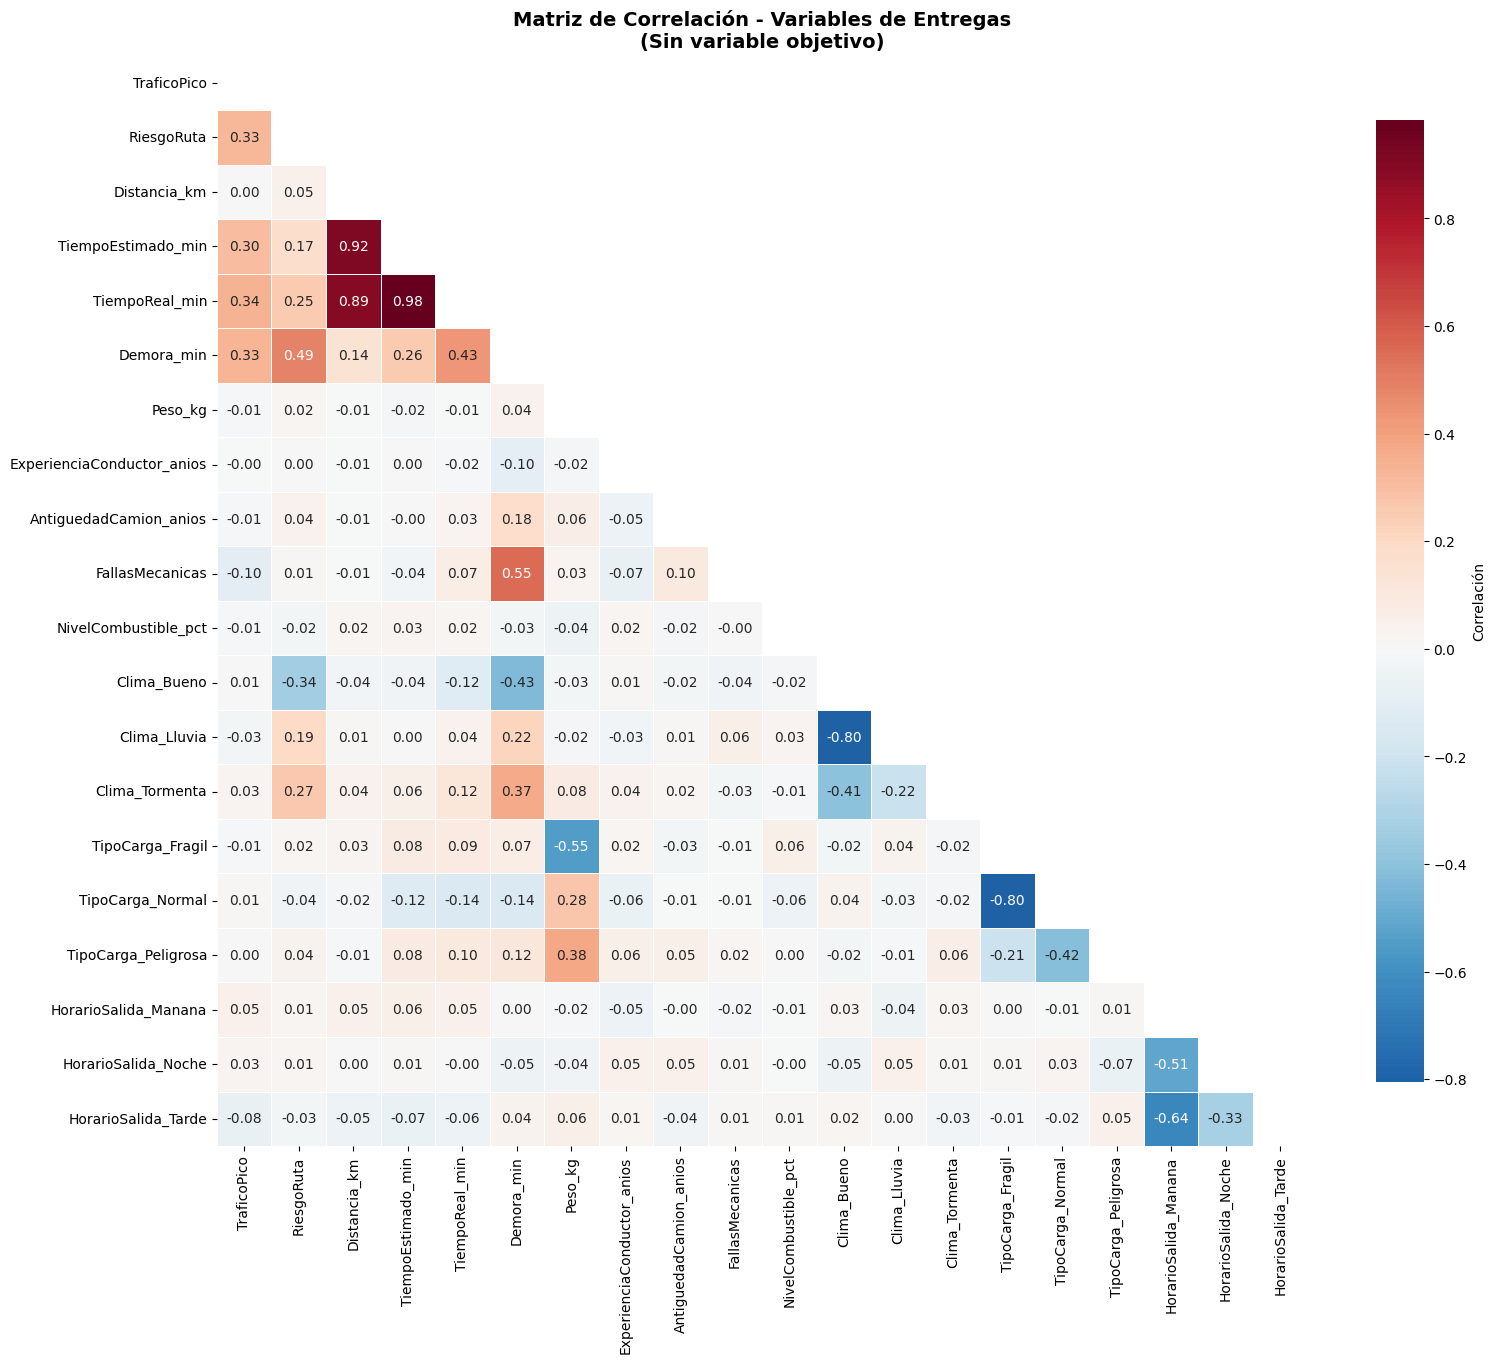

In [21]:
from sklearn.decomposition import PCA

print("\n" + "="*70)
print("ANÁLISIS DE CORRELACIÓN")
print("="*70)

# Construir DataFrame con nombres de columnas y convertir a numérico (coerce -> NaN si no convertible)
df_X = pd.DataFrame(X, columns=df_encoded.columns).apply(pd.to_numeric, errors='coerce')

# Aviso si hubo conversiones a NaN
if df_X.isnull().any().any():
    print("⚠️ Se encontraron valores no numéricos convertidos a NaN en df_X. Revise las columnas.")

# Matriz de correlación correcta
correlation_matrix = df_X.corr()

# Encontrar las correlaciones más fuertes
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'var1': correlation_matrix.columns[i],
            'var2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', ascending=False, key=lambda s: s.abs())

print("\n🔝 Top 10 correlaciones más fuertes:")
for idx, row in corr_df.head(10).iterrows():
    print(f"   {str(row['var1']):30} ↔ {str(row['var2']):30}: {row['correlation']:+.3f}")

# 4. Visualizar matriz de correlación
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlación', 'shrink': 0.8})
plt.title('Matriz de Correlación - Variables de Entregas\n(Sin variable objetivo)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Crear Pipeline completo para PCA
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])


ANÁLISIS DE VARIANZA EXPLICADA
PC 1: 16.99% ████████             (Acum: 16.99%)
PC 2: 11.20% █████                (Acum: 28.19%)
PC 3: 10.53% █████                (Acum: 38.72%)
PC 4:  8.41% ████                 (Acum: 47.12%)
PC 5:  7.85% ███                  (Acum: 54.97%)
PC 6:  6.81% ███                  (Acum: 61.78%)
PC 7:  6.59% ███                  (Acum: 68.37%)
PC 8:  6.28% ███                  (Acum: 74.65%)
PC 9:  5.38% ██                   (Acum: 80.03%)
PC10:  4.94% ██                   (Acum: 84.97%)
PC11:  4.69% ██                   (Acum: 89.66%)
PC12:  4.50% ██                   (Acum: 94.16%)
PC13:  2.82% █                    (Acum: 96.98%)
PC14:  2.18% █                    (Acum: 99.16%)
PC15:  0.68%                      (Acum: 99.83%)
PC16:  0.17%                      (Acum: 100.00%)
PC17:  0.00%                      (Acum: 100.00%)
PC18:  0.00%                      (Acum: 100.00%)
PC19:  0.00%                      (Acum: 100.00%)
PC20:  0.00%                     

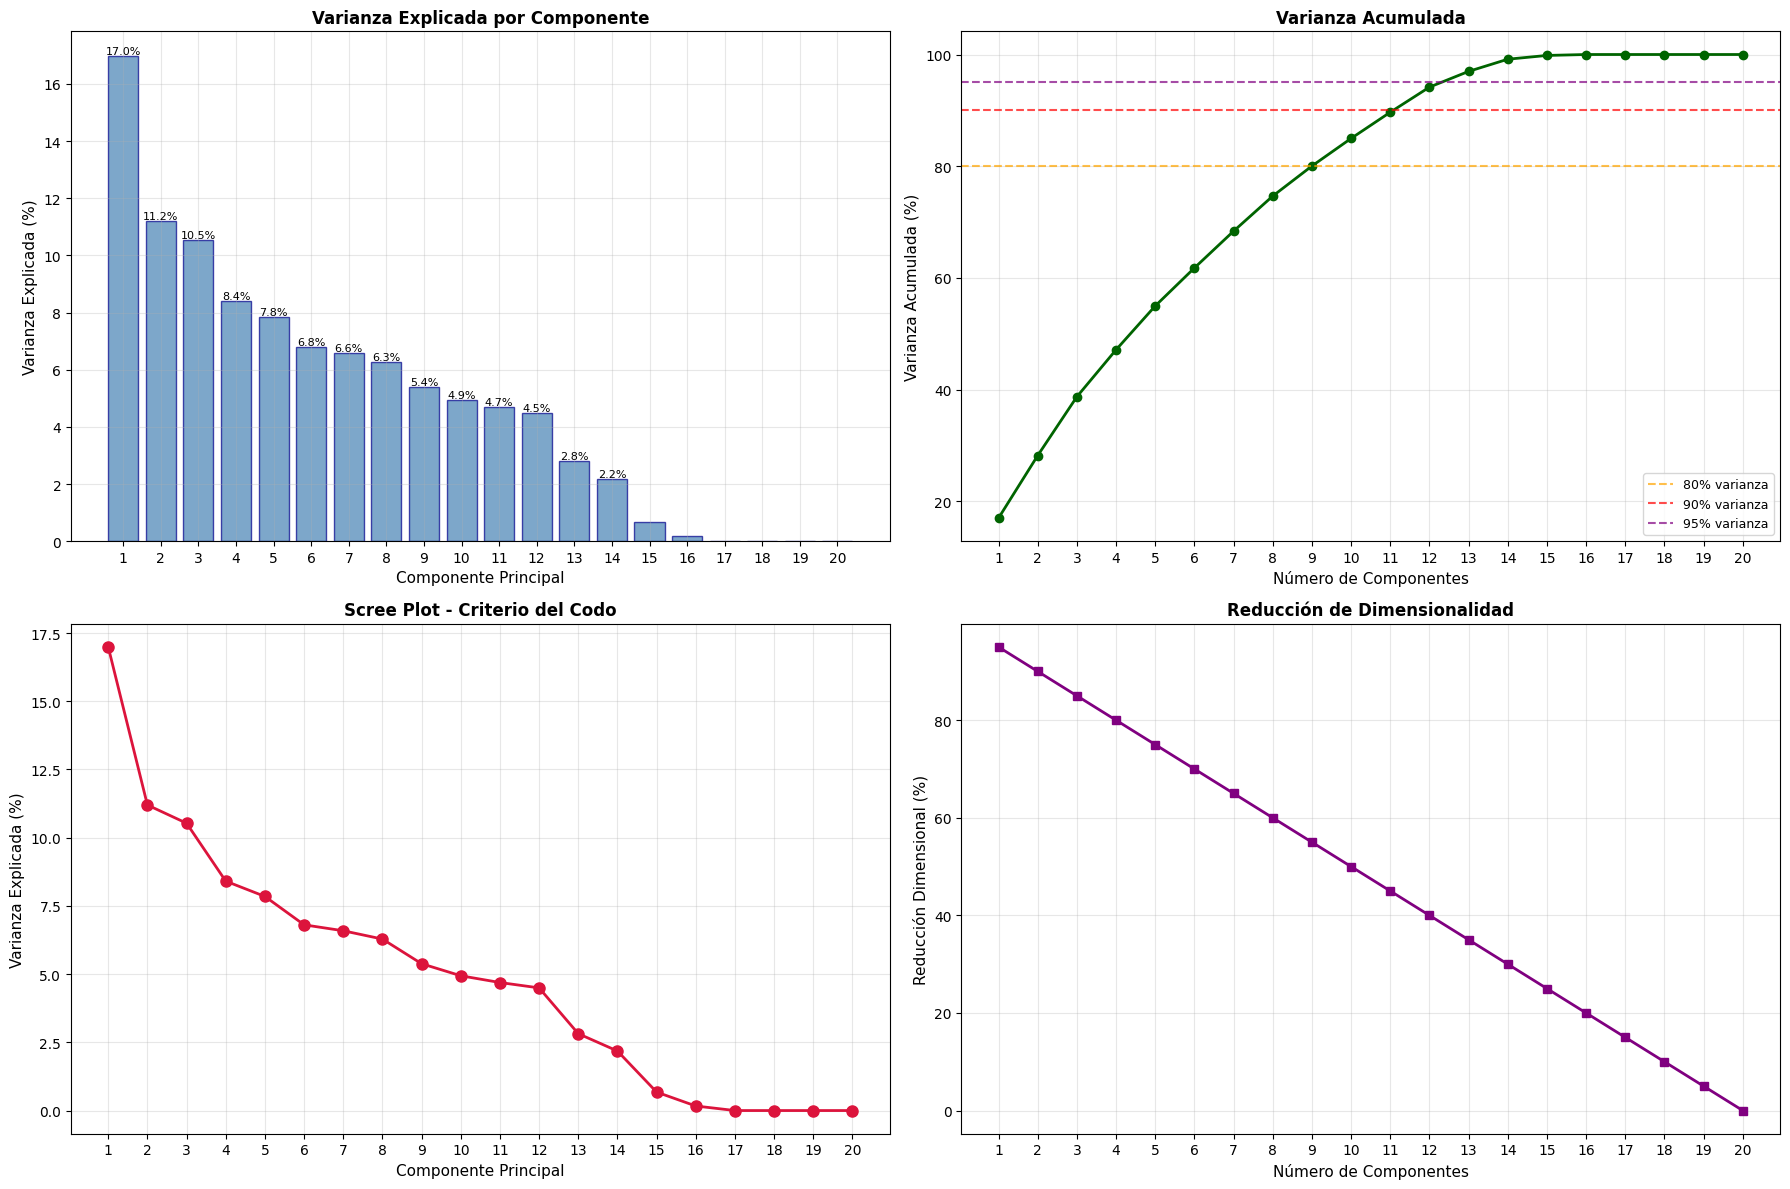


✅ Pipeline optimizado creado con 12 componentes
📊 Dimensiones después de PCA: (1000, 12)
📉 Reducción dimensional: 20 → 12 variables
📈 Reducción: 40.0%

📋 Primeras filas del dataset transformado:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.570801  0.068240  2.682245 -1.073643 -1.981885  0.492741 -0.045241   
1  1.427153 -0.944859 -1.579629  1.008370  1.315458 -1.535359  2.653865   
2 -0.468051 -2.416506  0.746057 -0.925416  0.781716  1.094962 -1.581465   
3  1.125039 -0.529984  1.960071 -1.821604  0.030955  1.930691  0.089469   
4 -2.856220 -0.436417 -0.603895 -1.062476  0.538809 -0.470995  0.861332   
5  2.793719  0.135287  1.301864  1.375216  0.947454 -0.766248 -0.239639   
6  2.592215 -1.564580 -1.072882  1.342140 -1.089350  0.398494 -0.252018   
7 -1.638217 -2.785107 -0.271060 -1.151701 -0.238896  1.184447  0.161553   
8 -2.650861 -0.923284 -0.897929 -1.047937  0.779587 -0.680297  0.273598   
9  0.928314  2.471695  1.183241  0.838924  0.525215  0

In [26]:
import joblib

# Usar la versión numérica df_X (preprocesada) como features para PCA
feature_columns = df_X.columns.tolist()

# Ajustar el pipeline usando df_X (DataFrame numérico)
pca_pipeline.fit(df_X)

# 6. Análisis de varianza explicada
pca_full = pca_pipeline.named_steps['pca']
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\n" + "="*70)
print("ANÁLISIS DE VARIANZA EXPLICADA")
print("="*70)

for i, (var, var_acum) in enumerate(zip(varianza_explicada, varianza_acumulada), 1):
    bar = "█" * int(var * 50)
    print(f"PC{i:2d}: {var*100:5.2f}% {bar:20s} (Acum: {var_acum*100:5.2f}%)")


# Usar la versión numérica df_X (preprocesada) como features para PCA
feature_columns = df_X.columns.tolist()

# Ajustar el pipeline usando df_X (DataFrame numérico)
pca_pipeline.fit(df_X)

# 6. Análisis de varianza explicada
pca_full = pca_pipeline.named_steps['pca']
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\n" + "="*70)
print("ANÁLISIS DE VARIANZA EXPLICADA")
print("="*70)

for i, (var, var_acum) in enumerate(zip(varianza_explicada, varianza_acumulada), 1):
    bar = "█" * int(var * 50)
    print(f"PC{i:2d}: {var*100:5.2f}% {bar:20s} (Acum: {var_acum*100:5.2f}%)")

# 7. Determinar número óptimo de componentes
n_componentes_80 = np.argmax(varianza_acumulada >= 0.80) + 1
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"\n🎯 Componentes necesarios:")
print(f"   • 80% de varianza: {n_componentes_80} componentes")
print(f"   • 90% de varianza: {n_componentes_90} componentes")
print(f"   • 95% de varianza: {n_componentes_95} componentes")

# 8. Visualización de varianza explicada
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Barras de varianza individual
bars = axes[0, 0].bar(range(1, len(varianza_explicada) + 1), 
                      varianza_explicada * 100, 
                      alpha=0.7, color='steelblue', edgecolor='darkblue')
axes[0, 0].set_xlabel('Componente Principal', fontsize=11)
axes[0, 0].set_ylabel('Varianza Explicada (%)', fontsize=11)
axes[0, 0].set_title('Varianza Explicada por Componente', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(1, len(varianza_explicada) + 1))

# Añadir valores sobre las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 2:
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Varianza acumulada
axes[0, 1].plot(range(1, len(varianza_acumulada) + 1), 
                varianza_acumulada * 100, 
                'o-', markersize=6, linewidth=2, color='darkgreen')
axes[0, 1].axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% varianza')
axes[0, 1].axhline(y=90, color='red', linestyle='--', alpha=0.7, label='90% varianza')
axes[0, 1].axhline(y=95, color='purple', linestyle='--', alpha=0.7, label='95% varianza')
axes[0, 1].set_xlabel('Número de Componentes', fontsize=11)
axes[0, 1].set_ylabel('Varianza Acumulada (%)', fontsize=11)
axes[0, 1].set_title('Varianza Acumulada', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(range(1, len(varianza_acumulada) + 1))

# Gráfico 3: Scree plot
axes[1, 0].plot(range(1, len(varianza_explicada) + 1), 
                varianza_explicada * 100, 
                'o-', markersize=8, linewidth=2, color='crimson')
axes[1, 0].set_xlabel('Componente Principal', fontsize=11)
axes[1, 0].set_ylabel('Varianza Explicada (%)', fontsize=11)
axes[1, 0].set_title('Scree Plot - Criterio del Codo', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(1, len(varianza_explicada) + 1))

# Gráfico 4: Componentes vs Reducción Dimensional
reduction_pct = (1 - np.arange(1, len(varianza_explicada) + 1) / len(varianza_explicada)) * 100
axes[1, 1].plot(range(1, len(varianza_explicada) + 1), 
                reduction_pct, 
                's-', markersize=6, linewidth=2, color='purple')
axes[1, 1].set_xlabel('Número de Componentes', fontsize=11)
axes[1, 1].set_ylabel('Reducción Dimensional (%)', fontsize=11)
axes[1, 1].set_title('Reducción de Dimensionalidad', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(1, len(varianza_explicada) + 1))

plt.tight_layout()
plt.show()

# 9. Crear pipeline optimizado con número de componentes seleccionado
n_componentes_seleccionados = n_componentes_90

pca_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_componentes_seleccionados))
])

# Transformar datos usando df_X (numérico)
df_pca = pca_optimized.fit_transform(df_X)

print(f"\n✅ Pipeline optimizado creado con {n_componentes_seleccionados} componentes")
print(f"📊 Dimensiones después de PCA: {df_pca.shape}")
print(f"📉 Reducción dimensional: {df_X.shape[1]} → {df_pca.shape[1]} variables")
print(f"📈 Reducción: {(1 - df_pca.shape[1]/df_X.shape[1])*100:.1f}%")

# 10. Crear DataFrame con componentes principales
columnas_pca = [f'PC{i+1}' for i in range(n_componentes_seleccionados)]
df_pca_resultado = pd.DataFrame(df_pca, columns=columnas_pca)

print("\n📋 Primeras filas del dataset transformado:")
print(df_pca_resultado.head(10))

print("\n📊 Estadísticas de los componentes principales:")
print(df_pca_resultado[columnas_pca].describe())

# 11. Análisis de cargas (loadings)
pca_reducido = pca_optimized.named_steps['pca']
loadings = pd.DataFrame(
    pca_reducido.components_.T,
    columns=columnas_pca,
    index=feature_columns
)

print("\n" + "="*70)
print("CARGAS DE LAS VARIABLES EN LOS COMPONENTES PRINCIPALES")
print("="*70)
print(loadings.round(3))

# 18. Calidad de la reducción: reconstrucción usando df_X.values
datos_reconstruidos = pca_optimized.inverse_transform(df_pca)
errores_por_variable = np.mean((df_X.values - datos_reconstruidos)**2, axis=0)
error_promedio = np.mean(errores_por_variable)

print(f"\n" + "="*70)
print("CALIDAD DE LA REDUCCIÓN DIMENSIONAL")
print("="*70)
print(f"📊 Error cuadrático medio general: {error_promedio:.6f}")
print(f"📈 Varianza preservada: {np.sum(pca_reducido.explained_variance_ratio_)*100:.2f}%")
print(f"📉 Varianza perdida: {(1-np.sum(pca_reducido.explained_variance_ratio_))*100:.2f}%")

print("\n🔍 Errores de reconstrucción por variable:")
error_df = pd.DataFrame({
    'Variable': feature_columns,
    'Error MSE': errores_por_variable
}).sort_values('Error MSE', ascending=False)

for idx, row in error_df.head(10).iterrows():
    print(f"   {row['Variable']:30s}: {row['Error MSE']:.6f}")

# 19. Exportar resultados
print(f"\n" + "="*70)
print("EXPORTANDO RESULTADOS")
print("="*70)

# Guardar proyección
df_pca_resultado.to_csv("entregas_pca_projection.csv", index=False)
print("✅ entregas_pca_projection.csv - Datos proyectados")

# Guardar cargas
loadings.round(4).to_csv("entregas_pca_loadings.csv")
print("✅ entregas_pca_loadings.csv - Cargas de variables")

# Guardar métricas
metrics_df = pd.DataFrame({
    'Component': columnas_pca,
    'Explained_Variance': pca_reducido.explained_variance_ratio_,
    'Explained_Variance_Cumulative': np.cumsum(pca_reducido.explained_variance_ratio_)
})
metrics_df.to_csv("entregas_pca_metrics.csv", index=False)
print("✅ entregas_pca_metrics.csv - Métricas de varianza")

# Guardar pipeline
joblib.dump(pca_optimized, 'entregas_pca_pipeline.joblib')
print("✅ entregas_pca_pipeline.joblib - Pipeline completo")

# Guardar matriz de correlación
correlation_matrix.to_csv("entregas_correlation_matrix.csv")
print("✅ entregas_correlation_matrix.csv - Matriz de correlación")

# 20. Resumen ejecutivo
print(f"\n" + "="*70)
print("📋 RESUMEN EJECUTIVO")
print("="*70)
print(f"Dataset original: {df.shape[0]} registros × {df.shape[1]} variables")
print(f"Variables analizadas: {len(feature_columns)} (excluyendo variable objetivo)")
print(f"Componentes seleccionados: {n_componentes_seleccionados}")
print(f"Reducción dimensional: {(1 - n_componentes_seleccionados/len(feature_columns))*100:.1f}%")
print(f"Varianza preservada: {np.sum(pca_reducido.explained_variance_ratio_)*100:.2f}%")
print(f"\n🎯 El análisis PCA ha reducido {len(feature_columns)} variables predictoras a {n_componentes_seleccionados}")
print(f"   componentes principales, preservando el {np.sum(pca_reducido.explained_variance_ratio_)*100:.1f}%")
print(f"   de la varianza total de los datos.")

print(f"\n✨ ANÁLISIS COMPLETADO EXITOSAMENTE ✨")

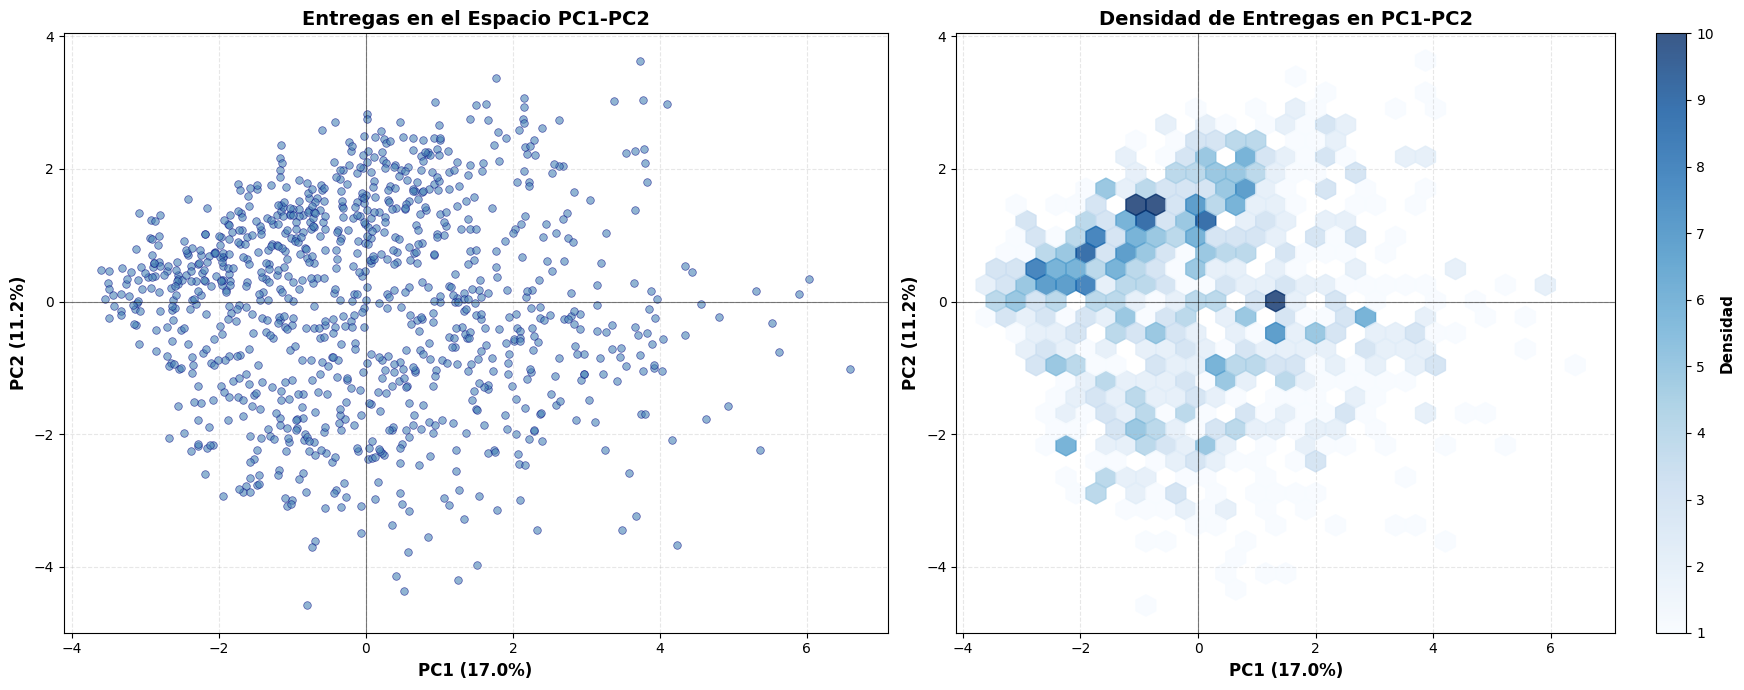

✅ Gráficos PC1-PC2 guardados: pca_scatter_plots.png


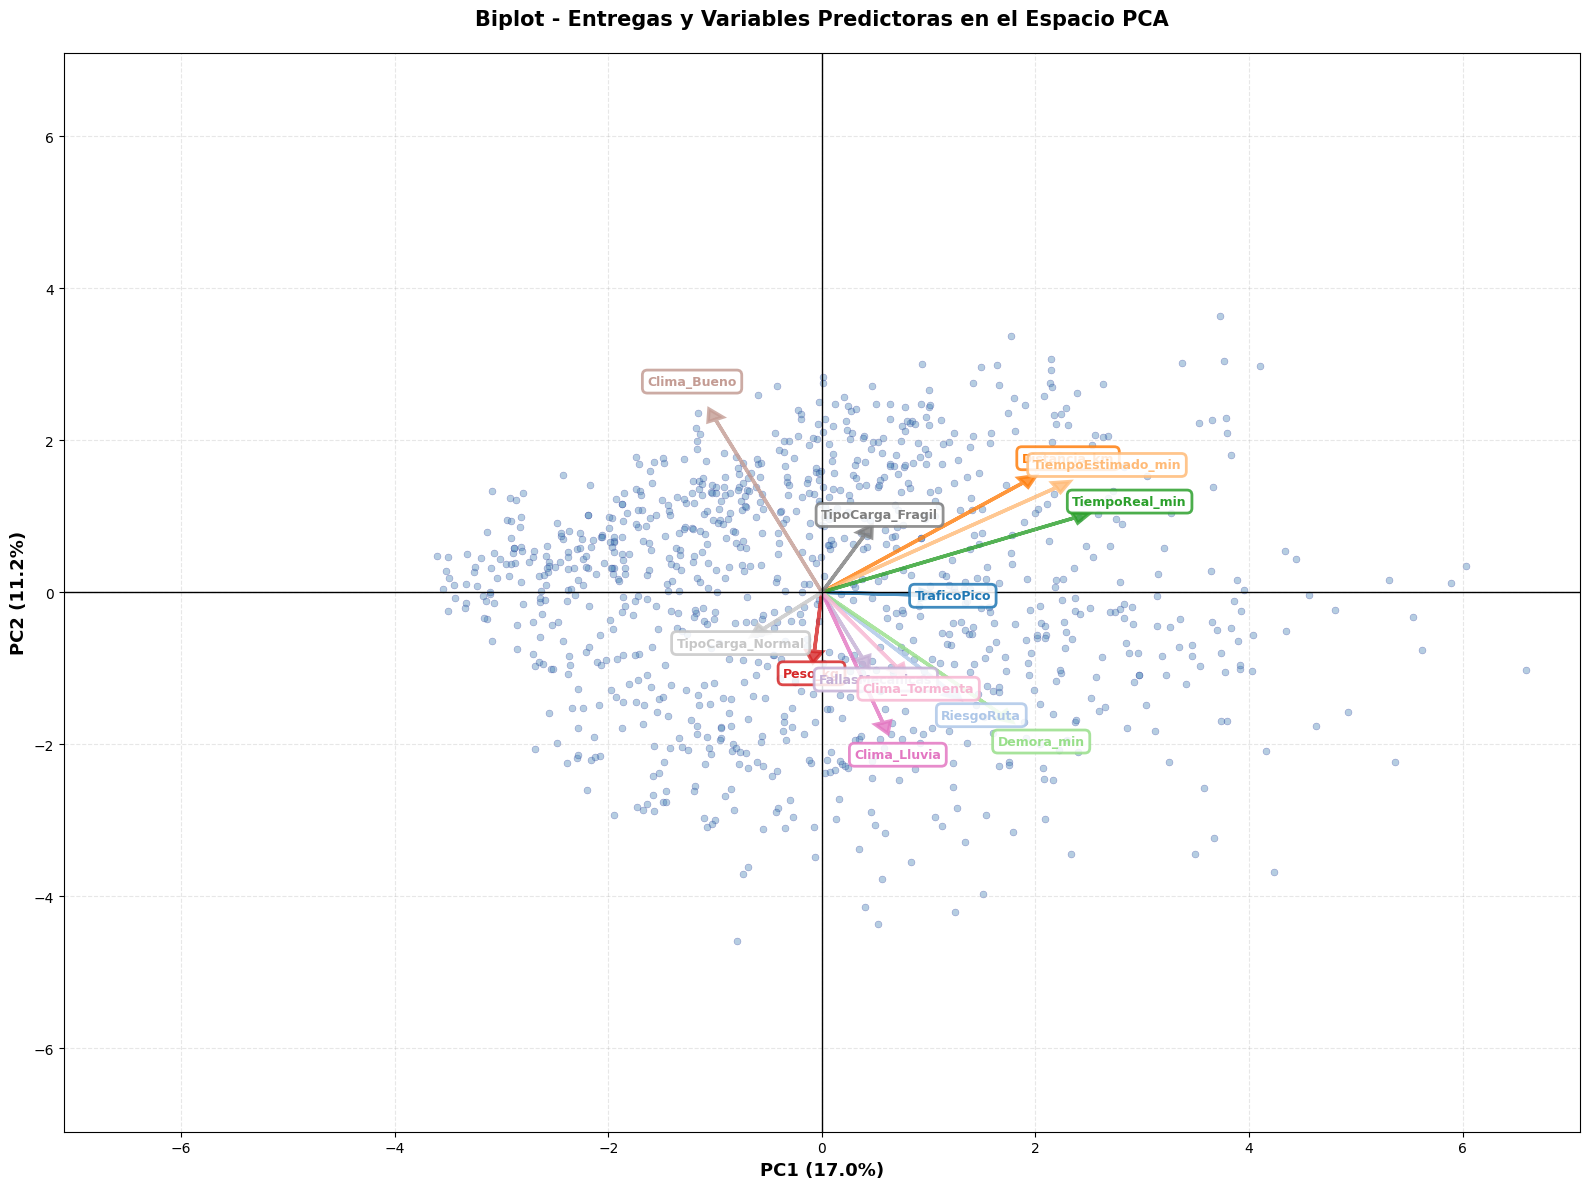

✅ Biplot guardado: pca_biplot.png

🎨 Visualizaciones adicionales completadas


In [27]:
# Visualización adicional: Scatter plots de PC1 vs PC2
if n_componentes_seleccionados >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Gráfico 1: Scatter plot simple PC1 vs PC2
    axes[0].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.6, s=30, c='steelblue', edgecolors='navy', linewidth=0.5)
    axes[0].set_xlabel(f'PC1 ({pca_reducido.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel(f'PC2 ({pca_reducido.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12, fontweight='bold')
    axes[0].set_title('Entregas en el Espacio PC1-PC2', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].axhline(y=0, color='k', linewidth=0.8, alpha=0.5)
    axes[0].axvline(x=0, color='k', linewidth=0.8, alpha=0.5)
    
    # Gráfico 2: Density plot con hexbin
    hb = axes[1].hexbin(df_pca[:, 0], df_pca[:, 1], gridsize=30, cmap='Blues', alpha=0.8, mincnt=1)
    axes[1].set_xlabel(f'PC1 ({pca_reducido.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel(f'PC2 ({pca_reducido.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Densidad de Entregas en PC1-PC2', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, linestyle='--')
    axes[1].axhline(y=0, color='k', linewidth=0.8, alpha=0.5)
    axes[1].axvline(x=0, color='k', linewidth=0.8, alpha=0.5)
    cbar = plt.colorbar(hb, ax=axes[1])
    cbar.set_label('Densidad', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('pca_scatter_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Gráficos PC1-PC2 guardados: pca_scatter_plots.png")

# Biplot mejorado - Entregas y Variables Predictoras
if n_componentes_seleccionados >= 2:
    def crear_biplot_entregas(score, coeff, labels, pc1=0, pc2=1):
        fig, ax = plt.subplots(figsize=(16, 12))
        
        # Scatter de observaciones (entregas)
        xs = score[:, pc1]
        ys = score[:, pc2]
        ax.scatter(xs, ys, alpha=0.4, s=25, c='steelblue', edgecolors='navy', linewidth=0.3)
        
        # Escalar vectores para mejor visualización
        scale_factor = 5
        
        # Vectores de variables (flechas)
        n_vars = len(labels)
        colors_vars = plt.cm.tab20(np.linspace(0, 1, n_vars))
        
        for i, (label, color) in enumerate(zip(labels, colors_vars)):
            # Calcular magnitud del vector
            magnitude = np.sqrt(coeff[i, pc1]**2 + coeff[i, pc2]**2)
            
            # Solo mostrar vectores significativos (magnitud > 0.15)
            if magnitude > 0.15:
                ax.arrow(0, 0, 
                        coeff[i, pc1]*scale_factor, 
                        coeff[i, pc2]*scale_factor,
                        color=color, alpha=0.8, 
                        head_width=0.15, head_length=0.15,
                        linewidth=2.5, 
                        length_includes_head=True)
                
                # Etiqueta de la variable
                ax.text(coeff[i, pc1]*scale_factor*1.15, 
                       coeff[i, pc2]*scale_factor*1.15,
                       label, 
                       color=color, 
                       ha='center', va='center', 
                       fontsize=9, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.4', 
                                facecolor='white', 
                                alpha=0.85, 
                                edgecolor=color, 
                                linewidth=2))
        
        ax.set_xlabel(f'PC{pc1+1} ({pca_reducido.explained_variance_ratio_[pc1]*100:.1f}%)', 
                     fontsize=13, fontweight='bold')
        ax.set_ylabel(f'PC{pc2+1} ({pca_reducido.explained_variance_ratio_[pc2]*100:.1f}%)', 
                     fontsize=13, fontweight='bold')
        ax.set_title('Biplot - Entregas y Variables Predictoras en el Espacio PCA',
                    fontsize=15, fontweight='bold', pad=20)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.axhline(y=0, color='k', linewidth=1)
        ax.axvline(x=0, color='k', linewidth=1)
        
        # Ajustar límites del gráfico
        xlim = np.max(np.abs(ax.get_xlim()))
        ylim = np.max(np.abs(ax.get_ylim()))
        max_lim = max(xlim, ylim)
        ax.set_xlim(-max_lim, max_lim)
        ax.set_ylim(-max_lim, max_lim)
        
        plt.tight_layout()
        plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Biplot guardado: pca_biplot.png")
    
    crear_biplot_entregas(df_pca, pca_reducido.components_.T, feature_columns)

print("\n🎨 Visualizaciones adicionales completadas")